In [2]:
import pandas as pd
import numpy as np
import pylab
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [2]:
raw = pd.read_pickle('wrds_relationship')
#raw.head().T

In [44]:
raw.head().T

,0,1,2,3,4
start,2016-11-03 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00
end,2017-08-10 00:00:00,2017-08-10 00:00:00,2017-08-10 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00
rev_,1.86334e+09,1.86334e+09,1.86334e+09,1.86334e+09,1.86336e+09
id,COMP-100000146,COMP-100003419,COMP-100005033,COMP-100005156,COMP-100005156
rel_type,COMPETITOR,COMPETITOR,COMPETITOR,COMPETITOR,COMPETITOR
source_company_id,194517865,1919323,1919323,1919323,1919323
target_company_id,194526071,1503347,1881542,6059160,6059160
subsidiaries,None,None,None,None,None
revenue_percent,NaN,NaN,NaN,NaN,NaN
percent_estimated,Y,Y,Y,Y,Y


# Customers and Suppliers

In [66]:
raw_customers = raw.loc[raw['rel_type'] == 'CUSTOMER']
raw_suppliers = raw.loc[raw['rel_type'] == 'SUPPLIER']

In [67]:
raw_customers = raw_customers[['id','start','end','rel_type','source_company_id','target_company_id', 
                               'source_ticker','source_cusip','source_isin','source_sedol',
                              'target_ticker','target_cusip','target_isin','target_sedol']]

In [68]:
raw_suppliers = raw_suppliers[['id','start','end','rel_type','source_company_id','target_company_id', 
                               'source_ticker','source_cusip','source_isin','source_sedol',
                              'target_ticker','target_cusip','target_isin','target_sedol']]

In [69]:
raw_suppliers = raw_suppliers.rename(columns={"source_ticker": "target_ticker", 
                                              "source_cusip": "target_cusip", 
                                              "source_company_id": "target_company_id",
                                              "source_isin":"target_isin",
                                              "source_sedol":"target_sedol",
                                              "target_ticker": "source_ticker", 
                                              "target_cusip": "source_cusip",
                                             "target_company_id": "source_company_id",
                                             "target_isin":"source_isin",
                                             "target_sedol":"source_sedol"})

In [70]:
raw_suppliers['rel_type'] = 'CUSTOMER'

In [71]:
raw_suppliers = raw_suppliers[['id','start','end','rel_type','source_company_id','target_company_id', 
                               'source_ticker','source_cusip','source_isin','source_sedol',
                              'target_ticker','target_cusip','target_isin','target_sedol']]

In [72]:
raw_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731283 entries, 419967 to 1186828
Data columns (total 14 columns):
id                   731283 non-null object
start                731283 non-null datetime64[ns]
end                  731283 non-null datetime64[ns]
rel_type             731283 non-null object
source_company_id    731283 non-null object
target_company_id    731283 non-null object
source_ticker        589308 non-null object
source_cusip         589809 non-null object
source_isin          589755 non-null object
source_sedol         589809 non-null object
target_ticker        399359 non-null object
target_cusip         401351 non-null object
target_isin          401233 non-null object
target_sedol         401386 non-null object
dtypes: datetime64[ns](2), object(12)
memory usage: 83.7+ MB


In [73]:
raw_suppliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256019 entries, 1732002 to 2090565
Data columns (total 14 columns):
id                   256019 non-null object
start                256019 non-null datetime64[ns]
end                  256019 non-null datetime64[ns]
rel_type             256019 non-null object
source_company_id    256019 non-null object
target_company_id    256019 non-null object
source_ticker        137061 non-null object
source_cusip         137750 non-null object
source_isin          137703 non-null object
source_sedol         137762 non-null object
target_ticker        206722 non-null object
target_cusip         207038 non-null object
target_isin          207038 non-null object
target_sedol         207039 non-null object
dtypes: datetime64[ns](2), object(12)
memory usage: 29.3+ MB


In [74]:
raw_sup_cus = pd.concat([raw_customers,raw_suppliers])

In [75]:
raw_sup_cus.to_pickle('raw_sup_cus.pkl')

In [76]:
raw_sup_cus.head()

,id,start,end,rel_type,source_company_id,target_company_id,source_ticker,source_cusip,source_isin,source_sedol,target_ticker,target_cusip,target_isin,target_sedol
419967,CUST-10394-6477,2005-06-15,2005-06-15,CUSTOMER,10394,6477,None,None,None,None,None,None,None,None
420260,CUST-10408-1145,2003-04-03,2003-07-13,CUSTOMER,10408,1145,None,None,None,None,None,None,None,None
420738,CUST-10408-1145,2003-07-13,2003-07-13,CUSTOMER,10408,1145,None,None,None,None,None,None,None,None
420892,CUST-10435-313,2003-04-27,2005-06-15,CUSTOMER,10435,313,None,None,None,None,None,None,None,None
421128,CUST-10435-313,2005-06-15,2005-06-15,CUSTOMER,10435,313,None,None,None,None,None,None,None,None


In [77]:
raw_sup_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987302 entries, 419967 to 2090565
Data columns (total 14 columns):
id                   987302 non-null object
start                987302 non-null datetime64[ns]
end                  987302 non-null datetime64[ns]
rel_type             987302 non-null object
source_company_id    987302 non-null object
target_company_id    987302 non-null object
source_ticker        726369 non-null object
source_cusip         727559 non-null object
source_isin          727458 non-null object
source_sedol         727571 non-null object
target_ticker        606081 non-null object
target_cusip         608389 non-null object
target_isin          608271 non-null object
target_sedol         608425 non-null object
dtypes: datetime64[ns](2), object(12)
memory usage: 113.0+ MB


In [1]:
sup_cus = pd.read_pickle('raw_sup_cus_clean.pkl')

NameError: name 'pd' is not defined

In [3]:
raw_source = raw[['source_company_id']]
raw_target = raw[['target_company_id']]

In [4]:
raw_source_cusip = raw[['source_cusip']]
raw_target_cusip = raw[['target_cusip']]

In [5]:
raw_source['id'] = raw_source['source_company_id']
raw_target['id'] = raw_target['target_company_id']

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
raw_source_cusip['cusip'] = raw_source_cusip['source_cusip']
raw_target_cusip['cusip'] = raw_target_cusip['target_cusip']

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
raw_source_cusip = raw_source_cusip.drop_duplicates(subset='cusip', keep='first')
raw_target_cusip = raw_target_cusip.drop_duplicates(subset='cusip', keep='first')

In [17]:
raw_firm = pd.merge(raw_source, raw_target, how='outer', on=['id'])

In [8]:
raw_cusip = pd.merge(raw_source_cusip, raw_target_cusip, how='outer', on=['cusip'])

In [9]:
raw_cusip.tail()

,source_cusip,cusip,target_cusip
33312,NaN,S8029K105,S8029K105
33313,NaN,Q4481P106,Q4481P106
33314,NaN,947621207,947621207
33315,NaN,Y7368L115,Y7368L115
33316,NaN,X7832X100,X7832X100


In [10]:
raw_cusip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33317 entries, 0 to 33316
Data columns (total 3 columns):
source_cusip    25187 non-null object
cusip           33316 non-null object
target_cusip    28298 non-null object
dtypes: object(3)
memory usage: 1.0+ MB


In [21]:
raw_firm = raw_firm.drop_duplicates(subset='id', keep='first')

In [24]:
raw_firm = raw_firm[['id']]

In [25]:
raw_firm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204494 entries, 0 to 405752863
Data columns (total 1 columns):
id    204494 non-null object
dtypes: object(1)
memory usage: 3.1+ MB


In [26]:
raw_firm.head()

,id
0,194517865
24,1919323
1554,7954
5908,10001
6524,1863401


In [7]:
raw_region = pd.read_pickle('company_raw.pkl')

In [27]:
raw_firm_region = pd.merge(raw_firm, raw_region, how='inner', on=['id'])

In [28]:
raw_firm_region.head()

,id,ticker,cusip,home_region
0,194517865,OROXF,68719610,CA
1,194517865,OROXF,68719610,CA
2,194517865,OROXF,68719610,CA
3,194517865,OROXF,68719610,CA
4,194517865,OROXF,68719610,CA


In [29]:
raw_firm_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217259 entries, 0 to 1217258
Data columns (total 4 columns):
id             1217259 non-null object
ticker         755354 non-null object
cusip          733726 non-null object
home_region    1063244 non-null object
dtypes: object(4)
memory usage: 46.4+ MB


In [30]:
region_hist = pd.DataFrame(raw_firm_region.groupby('home_region').size(), columns = ['numbers'])

In [35]:
region_hist = region_hist.sort_values(['numbers'], ascending = False)[: 20]

In [37]:
region_hist

,numbers
home_region,
US,228668
CN,134824
JP,87019
GB,50655
CA,44356
FR,32392
IN,32253
KR,31045
DE,30901


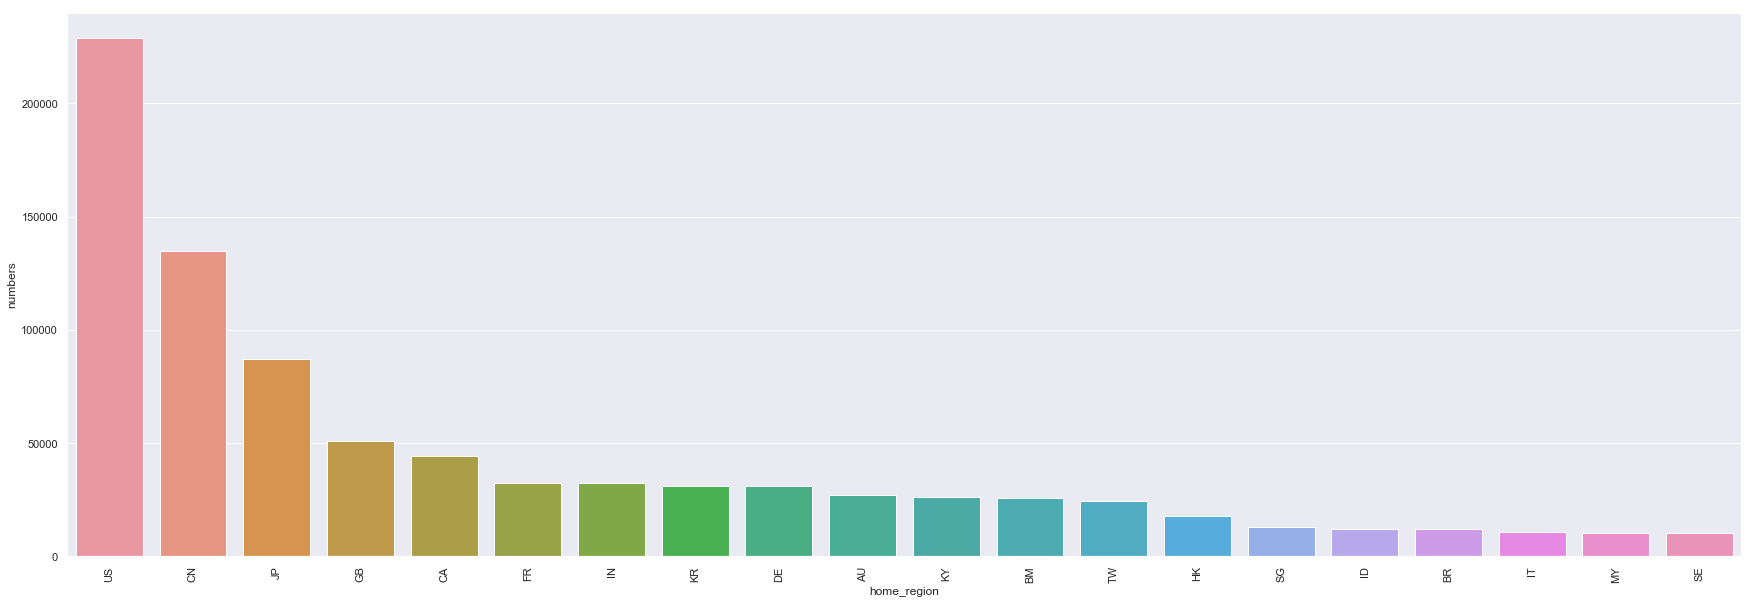

In [41]:
plt.figure(figsize=(30,10))
# plot barh chart with index as x values
ax = sns.barplot(region_hist.index,region_hist['numbers'])
ax.set_xticklabels(region_hist.index)
for item in ax.get_xticklabels(): item.set_rotation(90)
#plt.show()
pylab.rcParams['figure.figsize'] = (30, 10)
pylab.savefig('nation_num.png', dpi=400, bbox_inches = 'tight')

In [13]:
comp_cusip_api = pd.read_pickle('comp_cusip_api.pkl')

In [24]:
comp_cusip_api['cusip_8'] = comp_cusip_api['cusip'].str[:8]

In [25]:
comp_cusip_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38751 entries, 0 to 785630
Data columns (total 3 columns):
cusip      38750 non-null object
tic        38745 non-null object
cusip_8    38750 non-null object
dtypes: object(3)
memory usage: 1.2+ MB


In [26]:
comp_cusip_api.head()

,cusip,tic,cusip_8
0,000032102,AE.2,00003210
8,000165100,AMFD.,00016510
15,000352104,AAIC,00035210
23,00099V004,4165A,00099V00
53,000354100,ANTQ,00035410


In [27]:
raw_cusip['cusip_8'] = raw_cusip['cusip'].str[:8]

In [28]:
raw_cusip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33317 entries, 0 to 33316
Data columns (total 4 columns):
source_cusip    25187 non-null object
cusip           33316 non-null object
target_cusip    28298 non-null object
cusip_8         33316 non-null object
dtypes: object(4)
memory usage: 1.3+ MB


In [29]:
raw_cusip.head()

,source_cusip,cusip,target_cusip,cusip_8
0,687196105,687196105,687196105,68719610
1,None,None,None,None
2,71361F100,71361F100,71361F100,71361F10
3,879080109,879080109,879080109,87908010
4,Q1498M100,Q1498M100,Q1498M100,Q1498M10


In [16]:
raw_firm_cusip = pd.merge(raw_cusip, comp_cusip_api, how='inner', on=['cusip'])

In [30]:
cusip_8 = pd.merge(raw_cusip, comp_cusip_api, how='inner', on=['cusip_8'])

In [31]:
cusip_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7456
Data columns (total 6 columns):
source_cusip    6124 non-null object
cusip_x         7456 non-null object
target_cusip    6822 non-null object
cusip_8         7456 non-null object
cusip_y         7456 non-null object
tic             7456 non-null object
dtypes: object(6)
memory usage: 407.8+ KB


In [32]:
crsp_cusip = pd.read_pickle('crsp_cusip.pkl')

In [36]:
crsp_cusip['cusip_8'] = crsp_cusip['cusip']

In [37]:
crsp_cusip.head()

,cusip,cusip_8
0,68391610,68391610
19,36720410,36720410
400,05978R10,05978R10
402,81949130,81949130
729,39031810,39031810


In [38]:
crsp_raw = pd.merge(raw_cusip, crsp_cusip, how='inner', on=['cusip_8'])

In [39]:
crsp_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 5830
Data columns (total 5 columns):
source_cusip    5318 non-null object
cusip_x         5831 non-null object
target_cusip    5387 non-null object
cusip_8         5831 non-null object
cusip_y         5831 non-null object
dtypes: object(5)
memory usage: 273.3+ KB


In [40]:
crsp_comp = pd.merge(comp_cusip_api, crsp_cusip, how='inner', on=['cusip_8'])

In [41]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25581 entries, 0 to 25580
Data columns (total 4 columns):
cusip_x    25581 non-null object
tic        25581 non-null object
cusip_8    25581 non-null object
cusip_y    25581 non-null object
dtypes: object(4)
memory usage: 999.3+ KB


In [42]:
raw_crsp_comp = pd.merge(raw_cusip, crsp_comp, how='inner', on=['cusip_8'])

In [43]:
raw_crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5635 entries, 0 to 5634
Data columns (total 7 columns):
source_cusip    5158 non-null object
cusip           5635 non-null object
target_cusip    5203 non-null object
cusip_8         5635 non-null object
cusip_x         5635 non-null object
tic             5635 non-null object
cusip_y         5635 non-null object
dtypes: object(7)
memory usage: 352.2+ KB
